# Assignment 3

Vladislav Trukhin

## Question 1

### Question 1.a

In [1]:
import numpy as np
from skimage import io
from skimage import color
from scipy import ndimage

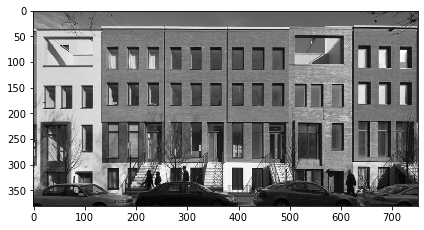

In [2]:
im = color.rgb2gray(io.imread("building.jpg"))
io.imshow(im)

In [3]:
def harris_corner_detect(im, sigma=1, alpha=0.04, threshold=0.000001):
    length, width = np.shape(im)
    corners = np.zeros(np.shape(im))
    # Compute gradients
    dx = ndimage.gaussian_filter(im, sigma, [1, 0])
    dy = ndimage.gaussian_filter(im, sigma, [0, 1])
    # Compute ix2, ixy, iy2
    dx2 = ndimage.gaussian_filter(dx**2, sigma)
    dy2 = ndimage.gaussian_filter(dy**2, sigma)
    dxy = ndimage.gaussian_filter(dx*dy, sigma)
    # Compute corner score R
    for x in range(length):
        for y in range(width):
            M = np.array([dx2[x, y], dxy[x, y], dxy[x, y], dy2[x, y]]).reshape(2, 2)
            score = np.linalg.det(M) - alpha*np.trace(M)**2
            if (score >= threshold):
                corners[x, y] = score
    # Non-maximum suppression
    max_corners = np.zeros(np.shape(corners))
    for x in range(length):
        for y in range(width):
            if corners[x, y] > 0:
                if x+1 < length and corners[x+1, y] > corners[x, y]:
                    continue
                if x-1 >= 0 and corners[x-1, y] > corners[x, y]:
                    continue
                if y+1 < width and corners[x, y+1] > corners[x, y]:
                    continue
                if y-1 >= 0 and corners[x, y-1] > corners[x, y]:
                    continue
                max_corners[x, y] = 1
    return max_corners

/Users/vladislavtrukhin/opt/anaconda3/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/var/folders/pc/0kwjmp2j1_sgm8fzrls2x5m80000gn/T/ipykernel_19603/1867833861.py:3: UserWarning: q1a.jpg is a low contrast image
  io.imsave("q1a.jpg", max_corners)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


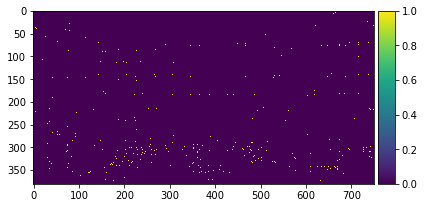

In [4]:
max_corners = harris_corner_detect(im)
io.imshow(max_corners)
io.imsave("q1a.jpg", max_corners)

### Question 1.b

/Users/vladislavtrukhin/opt/anaconda3/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Lossy conversion from float64 to uint8. Range [0.0, 1.9991666666666668]. Convert image to uint8 prior to saving to suppress this warning.


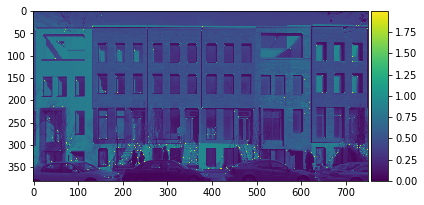

In [5]:
io.imshow(im + max_corners)
io.imsave("q1b.jpg", im + max_corners)

## Question 2

### Question 2.a

In [6]:
import matplotlib.pyplot as plt
import cv2

In [7]:
ref = io.imread("reference.png")
test = io.imread("test.png")
test2 = io.imread("test2.png")

sift = cv2.xfeatures2d.SIFT_create()

[ WARN:0@0.155] global /Users/runner/work/opencv-python/opencv-python/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


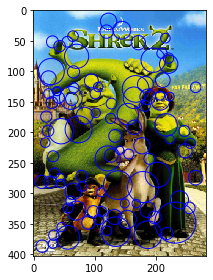

In [8]:
key_ref, desc_ref = sift.detectAndCompute(ref, None)

# Find and plot 100 largest keypoints
last_pt = (-1, -1)
last_size = np.inf
for i in range(100):
    # Find next largest keypoint
    new_pt = (-1, -1)
    new_size = -np.inf
    for d in key_ref:
        if new_size < d.size and last_size > d.size:
            new_size = d.size
            new_pt = d.pt
    # Plot next largest keypoint
    plt.gca().add_patch(plt.Circle(new_pt, new_size, color='b', fill=False))
    # Next largest is now last largest
    last_size = new_size
    last_pt = new_pt
io.imshow(ref)

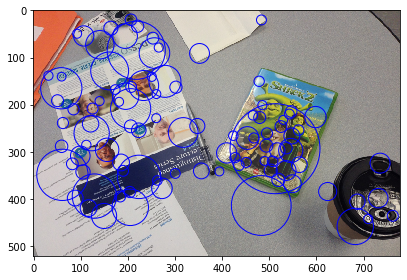

In [9]:
key_test, desc_test = sift.detectAndCompute(test, None)

# Find and plot 100 largest keypoints
last_pt = (-1, -1)
last_size = np.inf
for i in range(100):
    # Find next largest keypoint
    new_pt = (-1, -1)
    new_size = -np.inf
    for d in key_test:
        if new_size < d.size and last_size > d.size:
            new_size = d.size
            new_pt = d.pt
    # Plot next largest keypoint
    plt.gca().add_patch(plt.Circle(new_pt, new_size, color='b', fill=False))
    # Next largest is now last largest
    last_size = new_size
    last_pt = new_pt
io.imshow(test)

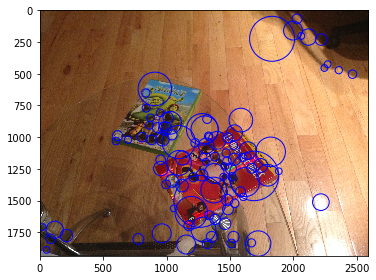

In [10]:
key_test2, desc_test2 = sift.detectAndCompute(test2, None)

# Find and plot 100 largest keypoints
last_pt = (-1, -1)
last_size = np.inf
for i in range(100):
    # Find next largest keypoint
    new_pt = (-1, -1)
    new_size = -np.inf
    for d in key_test2:
        if new_size < d.size and last_size > d.size:
            new_size = d.size
            new_pt = d.pt
    # Plot next largest keypoint
    plt.gca().add_patch(plt.Circle(new_pt, new_size, color='b', fill=False))
    # Next largest is now last largest
    last_size = new_size
    last_pt = new_pt
io.imshow(test2)

### Question 2.b

In [11]:
closest_test = np.ones(np.shape(desc_ref)[0], dtype=float) * np.inf
closest_idx_test = np.ones(np.shape(desc_ref)[0], dtype=int) * -1
# Iterate through all ref features
for i in range(np.shape(desc_ref)[0]):
    # Find top 2 best matching test features to ref feature by shortest norm 2 distance
    distance = np.sqrt(np.sum(np.square(desc_ref[i] - desc_test), axis=1))
    closest = np.argpartition(distance, 2)[0:2]
    closest = closest[np.argsort(distance[closest])]
    # Accept closest test feature if ratio of 2 best is below threshold
    if (distance[closest[0]] / distance[closest[1]]) < 0.5:
        closest_test[i] = distance[closest[0]]
        closest_idx_test[i] = closest[0]

# Select top 3 best matches by shortest norm 2 difference
top_test = np.argpartition(closest_test, 3)[0:3]

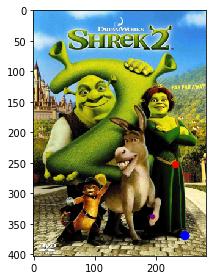

In [12]:
plt.gca().add_patch(plt.Circle(key_ref[top_test[0]].pt, key_ref[top_test[0]].size, color="r"))
plt.gca().add_patch(plt.Circle(key_ref[top_test[1]].pt, key_ref[top_test[1]].size, color="b"))
plt.gca().add_patch(plt.Circle(key_ref[top_test[2]].pt, key_ref[top_test[2]].size, color="purple"))
io.imshow(ref)

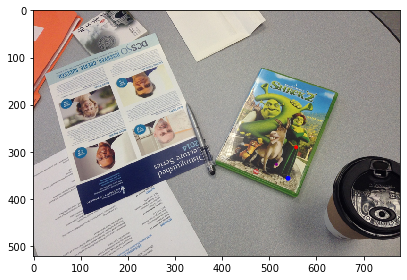

In [13]:
plt.gca().add_patch(plt.Circle(key_test[closest_idx_test[top_test[0]]].pt, key_test[closest_idx_test[top_test[0]]].size, color="r"))
plt.gca().add_patch(plt.Circle(key_test[closest_idx_test[top_test[1]]].pt, key_test[closest_idx_test[top_test[1]]].size, color="b"))
plt.gca().add_patch(plt.Circle(key_test[closest_idx_test[top_test[2]]].pt, key_test[closest_idx_test[top_test[2]]].size, color="purple"))
io.imshow(test)

In [14]:
closest_test2 = np.ones(np.shape(desc_ref)[0], dtype=float) * np.inf
closest_idx_test2 = np.ones(np.shape(desc_ref)[0], dtype=int) * -1
# Iterate through all ref features
for i in range(np.shape(desc_ref)[0]):
    # Find top 2 best matching test2 features to ref feature by shortest norm 2 distance
    distance = np.sqrt(np.sum(np.square(desc_ref[i] - desc_test2), axis=1))
    closest = np.argpartition(distance, 2)[0:2]
    closest = closest[np.argsort(distance[closest])]
    # Accept closest test2 feature if ratio of 2 best is below threshold
    if (distance[closest[0]] / distance[closest[1]]) < 0.5:
        closest_test2[i] = distance[closest[0]]
        closest_idx_test2[i] = closest[0]

# Select top 3 best matches by shortest norm 2 difference
top_test2 = np.argpartition(closest_test2, 3)[0:3]

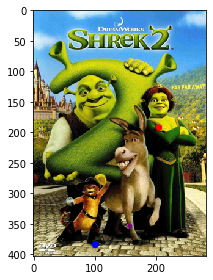

In [15]:
plt.gca().add_patch(plt.Circle(key_ref[top_test2[0]].pt, key_ref[top_test2[0]].size, color="r"))
plt.gca().add_patch(plt.Circle(key_ref[top_test2[1]].pt, key_ref[top_test2[1]].size, color="b"))
plt.gca().add_patch(plt.Circle(key_ref[top_test2[2]].pt, key_ref[top_test2[2]].size, color="purple"))
io.imshow(ref)

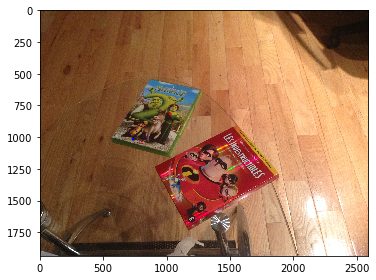

In [16]:
plt.gca().add_patch(plt.Circle(key_test2[closest_idx_test2[top_test2[0]]].pt, key_test2[closest_idx_test2[top_test2[0]]].size, color="r"))
plt.gca().add_patch(plt.Circle(key_test2[closest_idx_test2[top_test2[1]]].pt, key_test2[closest_idx_test2[top_test2[1]]].size, color="b"))
plt.gca().add_patch(plt.Circle(key_test2[closest_idx_test2[top_test2[2]]].pt, key_test2[closest_idx_test2[top_test2[2]]].size, color="purple"))
io.imshow(test2)

### Question 2.c

In [17]:
# P_inv calc
x, y = np.array(key_ref[top_test[0]].pt) 
row0 = np.array([[x, y, 0, 0, 1, 0], [0, 0, x, y, 0, 1]])
x, y = np.array(key_ref[top_test[1]].pt) 
row1 = np.array([[x, y, 0, 0, 1, 0], [0, 0, x, y, 0, 1]])
x, y = np.array(key_ref[top_test[2]].pt) 
row2 = np.array([[x, y, 0, 0, 1, 0], [0, 0, x, y, 0, 1]])
P = np.concatenate((row0, row1, row2))
P_inv = np.linalg.inv(P)

# P_prime calc
x, y = np.array(key_test[closest_idx_test[top_test[0]]].pt) 
row0 = np.array([x, y]).reshape(2, 1)
x, y = np.array(key_test[closest_idx_test[top_test[1]]].pt) 
row1 = np.array([x, y]).reshape(2, 1)
x, y = np.array(key_test[closest_idx_test[top_test[2]]].pt) 
row2 = np.array([x, y]).reshape(2, 1)
P_prime = np.concatenate((row0, row1, row2))

# Affine calc
affine_test = P_inv @ P_prime
print(affine_test)

[[ 6.00701953e-01]
 [-2.25549029e-01]
 [ 2.46775451e-01]
 [ 5.31183397e-01]
 [ 4.74148056e+02]
 [ 9.85825492e+01]]


In [18]:
# P_inv calc
x, y = np.array(key_ref[top_test2[0]].pt) 
row0 = np.array([[x, y, 0, 0, 1, 0], [0, 0, x, y, 0, 1]])
x, y = np.array(key_ref[top_test2[1]].pt) 
row1 = np.array([[x, y, 0, 0, 1, 0], [0, 0, x, y, 0, 1]])
x, y = np.array(key_ref[top_test2[2]].pt) 
row2 = np.array([[x, y, 0, 0, 1, 0], [0, 0, x, y, 0, 1]])
P = np.concatenate((row0, row1, row2))
P_inv = np.linalg.inv(P)

# P_prime calc
x, y = np.array(key_test2[closest_idx_test2[top_test2[0]]].pt) 
row0 = np.array([x, y]).reshape(2, 1)
x, y = np.array(key_test2[closest_idx_test2[top_test2[1]]].pt) 
row1 = np.array([x, y]).reshape(2, 1)
x, y = np.array(key_test2[closest_idx_test2[top_test2[2]]].pt) 
row2 = np.array([x, y]).reshape(2, 1)
P_prime = np.concatenate((row0, row1, row2))

# Affine calc
affine_test2 = P_inv @ P_prime
print(affine_test2)

[[ 1.58469300e+00]
 [-6.70238571e-01]
 [ 4.02258659e-01]
 [ 1.25171627e+00]
 [ 8.33428383e+02]
 [ 4.94137331e+02]]


### Question 2.d

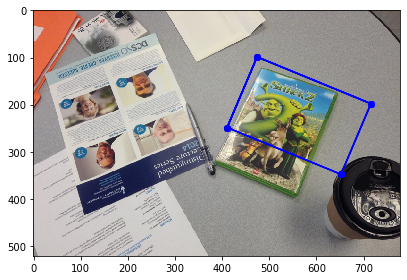

In [19]:
x, y, z = np.shape(ref)
x -= 1
y -= 1

# Find ref to test affine transformation
edg = np.array([[0, 3], [0, 1], [0, 3], [0, 2], [1, 3], [0, 2], [2, 3], [0, 1]])
pt1 = np.array(np.array([[x, y, 0, 0, 1, 0], [0, 0, x, y, 0, 1]]) @ affine_test)
pt2 = np.array(np.array([[x, 0, 0, 0, 1, 0], [0, 0, x, 0, 0, 1]]) @ affine_test)
pt3 = np.array(np.array([[0, y, 0, 0, 1, 0], [0, 0, 0, y, 0, 1]]) @ affine_test)
pt4 = np.array(np.array([[0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]]) @ affine_test)
pt = np.concatenate((pt1, pt2, pt3, pt4)).reshape(4, 2).T

# Plot
plt.plot(pt[0, edg], pt[1, edg], linestyle='-', color='b', marker='o')
io.imshow(test)

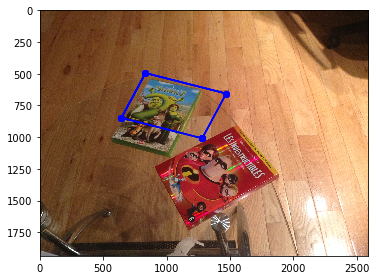

In [20]:
x, y, z = np.shape(ref)
x -= 1
y -= 1

# Find ref to test2 affine transformation
edg = np.array([[0, 3], [0, 1], [0, 3], [0, 2], [1, 3], [0, 2], [2, 3], [0, 1]])
pt1 = np.array(np.array([[x, y, 0, 0, 1, 0], [0, 0, x, y, 0, 1]]) @ affine_test2)
pt2 = np.array(np.array([[x, 0, 0, 0, 1, 0], [0, 0, x, 0, 0, 1]]) @ affine_test2)
pt3 = np.array(np.array([[0, y, 0, 0, 1, 0], [0, 0, 0, y, 0, 1]]) @ affine_test2)
pt4 = np.array(np.array([[0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]]) @ affine_test2)
pt = np.concatenate((pt1, pt2, pt3, pt4)).reshape(4, 2).T

# Plot
plt.plot(pt[0, edg], pt[1, edg], linestyle='-', color='b', marker='o')
io.imshow(test2)